In [2]:
# dataframe opertations - pandas
import pandas as pd
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
# holt winters
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#read product df and print shape to check proper reading
df = pd.read_csv("/content/drive/MyDrive/forecast.csv")
df.shape

(46788, 5)

In [5]:
#Convert the month column to datetime format
df['Month'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01')

In [6]:
#make a list of products, and another list to store each products info
products = df["Product_Num"].unique().tolist()
product_dfs=[]

In [7]:
#Organize and fill the products_dfs list
for i in range(len(products)):
      product_dfs.append(df[df["Product_Num"] == products[i]])
      product_dfs[i]=product_dfs[i].drop(columns=["Unnamed: 0", "Year"])

product_dfs[0].head()

,Product_Num,Month,total_demand
0,SH001,1997-01-01,223
557,SH001,1997-02-01,248
1114,SH001,1997-03-01,324
1671,SH001,1997-04-01,238
2228,SH001,1997-05-01,342


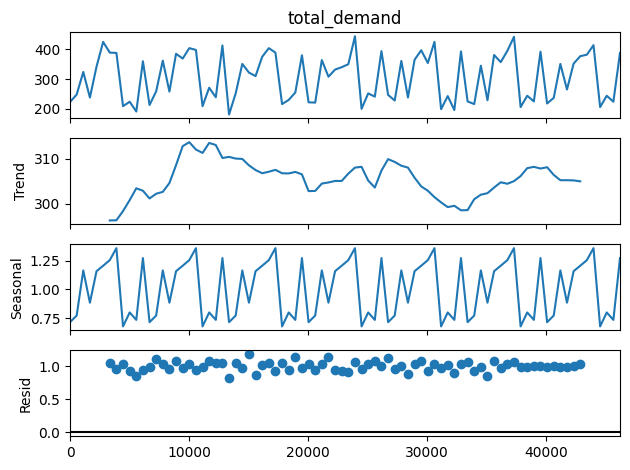

In [8]:
#visualize the different trends in demand for the first product
decompose_result = seasonal_decompose(product_dfs[0]["total_demand"], model="multiplicative", period = 12)
decompose_result.plot();

In [9]:
# Set the frequency of the date time index as Monthly
product_dfs[0].index.freq = "MS"

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


<Axes: title={'center': 'Holt Winters Triple Exponential Smoothing: Multiplicative Seasonality'}>

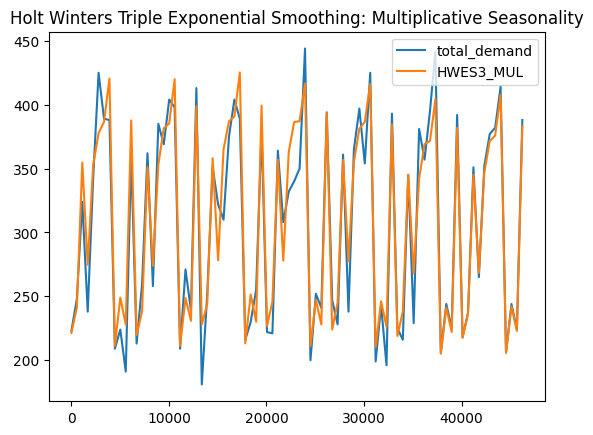

In [10]:
#visualize the fitting on product SSH001
product_dfs[0]["HWES3_MUL"] = ExponentialSmoothing(product_dfs[0]["total_demand"],trend="mul",seasonal="mul",seasonal_periods=12).fit().fittedvalues

product_dfs[0][["total_demand","HWES3_MUL"]].plot(title="Holt Winters Triple Exponential Smoothing: Multiplicative Seasonality")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


235.83899285697353


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: >

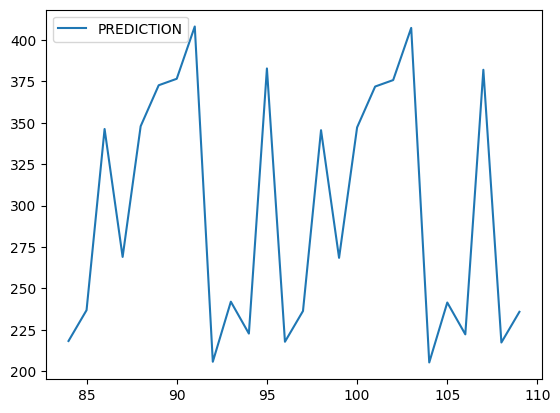

In [11]:
#Test the forecast on product SSH001
fitted_model = ExponentialSmoothing(product_dfs[0]["total_demand"],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(26)
print(test_predictions[109])
test_predictions.plot(legend=True,label="PREDICTION")

In [12]:
#Forecast February 2007 demand for every product
for product_df in product_dfs:
  product_df["February 2007 Demand"] = ExponentialSmoothing(product_df["total_demand"],trend='mul',seasonal='mul',seasonal_periods=12).fit().forecast(26)[109]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the

In [13]:
#Organize the demand for each product in a dictionary
feb_demand_dict = {'Product': [], 'Feb Demand': []}
for i in range(len(products)):
  feb_demand_dict['Product'].append(products[i])
  feb_demand_dict['Feb Demand'].append(product_dfs[i]["February 2007 Demand"].unique())

In [14]:
#format the dictionary into a dataframe
feb_demand_df = pd.DataFrame.from_dict(feb_demand_dict)

In [15]:
#make sure all values are floats
feb_demand_df["Feb Demand"] = feb_demand_df["Feb Demand"].astype(float)

In [16]:
#check that it df is formatted properly
feb_demand_df.head()

,Product,Feb Demand
0,SH001,235.838993
1,SH002,227.398111
2,SH003,235.665980
3,SH004,206.484805
4,SH005,231.715455


In [17]:
#save the df to the proper location
feb_demand_df.to_csv("/content/drive/MyDrive/feb_demand.csv", index = False)